# 0. Imports

In [1]:
import datetime
import os

import pandas          as pd
import numpy           as np
import seaborn         as sns
import plotly.express  as px
import statsmodels.api as sm

from IPython.display             import Image
from matplotlib                  import pyplot as plt
from matplotlib                  import gridspec
from statsmodels.stats.multicomp import tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

import warnings
warnings.filterwarnings('ignore')

In [2]:
def custom_settings():
    %matplotlib inline
        
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = (20,15)
    plt.rcParams['font.size'] = 10

def format_numbers():
    pd.set_option('display.float_format', lambda x: '%.2f' % x) 
    
custom_settings()
format_numbers()

# 1. Data collection

In [3]:
data = pd.read_csv('data/dataset_update.csv', sep=',')

# 2. Data Description

## 2.1. Data Dimension

In [4]:
print('Number of rows: {}' .format (data.shape[0]))
print('Number of columns: {}' .format (data.shape[1]))

Number of rows: 2155
Number of columns: 40


## 2.2. Data Types

In [5]:
#data.head().T

In [6]:
data.dtypes

order_id                int64
order_date             object
required_date          object
shipped_date           object
product_id              int64
product_name           object
order_unit_price      float64
quantity                int64
discount              float64
ship_via                int64
freight               float64
ship_name              object
ship_city              object
ship_country           object
shipper_id              int64
shipper_name           object
category_id             int64
category_name          object
quantity_per_unit      object
product_unit_price    float64
units_in_stock          int64
units_on_order          int64
reorder_level           int64
discontinued            int64
supplier_id             int64
supplier_name          object
supplier_city          object
supplier_country       object
customer_id            object
customer_name          object
customer_city          object
customer_country       object
lat                    object
long      

## 2.3. Check NA

In [7]:
#data.isna().sum()

## 2.4. Change variables types

In [8]:
data['order_date'] = pd.to_datetime(data['order_date'])
data['required_date'] = pd.to_datetime(data['required_date'])
data['shipped_date'] = pd.to_datetime(data['shipped_date'])
data['employee_hire_date'] = pd.to_datetime(data['employee_hire_date'])

In [9]:
#data['lat'] = data['lat'].astype(float)

# 3.0 Features Creation

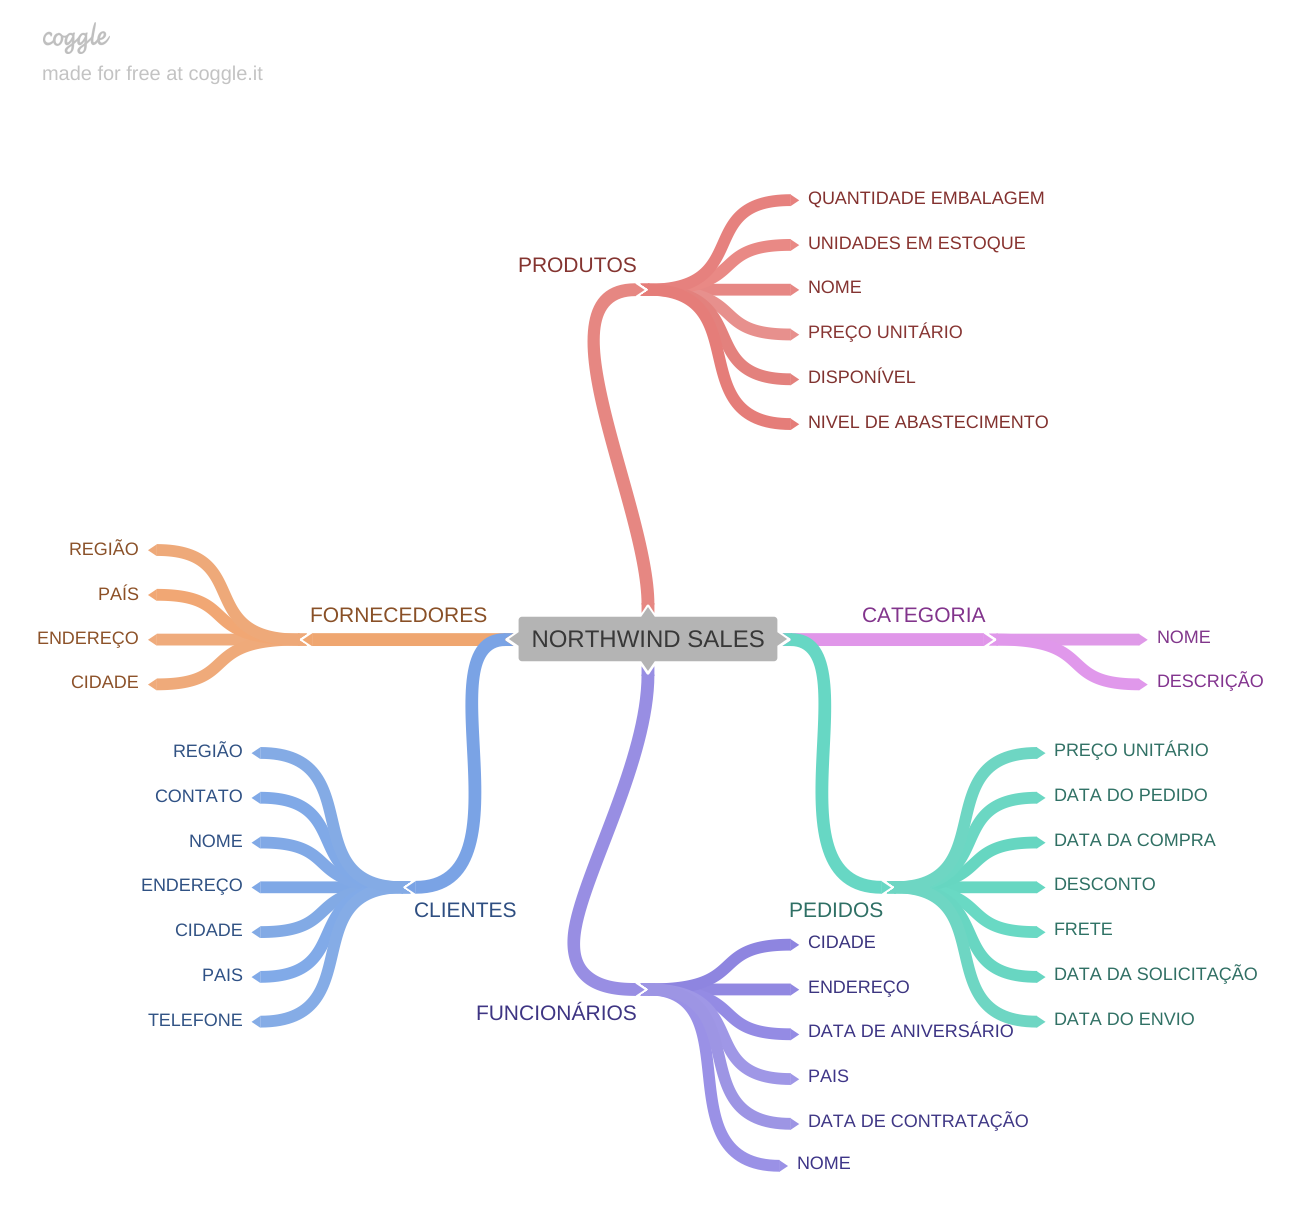

In [10]:
Image('img/mindmap/mind_map.png')

In [11]:
# tempo de envio | tempo entre o pedido e a entrega
# data['shipped_time'] = data['required_date'] - data['order_date']

# tempo de transporte
#data['transport_time'] = data['required_date'] - data['shipped_date']

#data[['order_date','required_date','shipped_date', 'shipped_time', 'transport_time']]

In [12]:
#aux1 = data[['customer_id', 'order_date']]
#aux1 = aux1.drop_duplicates(subset='order_id', keep='last')
#aux = data[['customer_id', 'order_date']].groupby('customer_id').max().reset_index()
#aux['recency_days'] = (data['order_date'].max() - aux['order_date']).dt.days
#aux = aux[['customer_id','recency_days']].copy()

In [13]:
aux1 = data[['customer_id', 'order_id']].copy()
aux1 = aux1.drop_duplicates(subset='order_id', keep='last')
aux1 = aux1[['customer_id', 'order_id']].groupby('customer_id').count().reset_index()
aux1['frequency'] = aux1['order_id']

In [14]:
data['order_year'] = data['order_date'].dt.year
data['order_month'] = data['order_date'].dt.month

In [15]:
#discount = data[['order_id','discount']].copy()

#discount = aux1[['order_id','discount']].groupby('order_id').sum().reset_index()

#discount['have_discount'] = discount[['discount']].apply (lambda x: 0 if(x['discount'] > 0) else 1, axis=1) 
#data['have_discount'] = discount['have_discount']

In [16]:
total = data[['order_id', 'order_unit_price', 'quantity']].copy()
total['total'] = total['order_unit_price'] * total['quantity']

#aux['total_order'] = aux[['total', 'discount', 'have_discount']].apply (lambda 
#                                                                x: x['total'] - (x['total'] * x['discount']) 
#                                                                if x['have_discount'] == 0
#                                                                else x['total'], axis=1) 

total['total_sale'] = total[['order_id','total']].groupby('order_id').transform('sum')

data['total_sale'] = total['total_sale']

In [17]:
#aux = data[['customer_id', 'order_date']].copy()
#aux['last_purchase'] = aux[['customer_id', 'order_date']].groupby('customer_id').transform('max')
#aux['active_sale'] = aux['order_date'].max() - datetime.timedelta(days= 60)

#aux['customer-active'] = aux[['active_sale', 'last_purchase']].apply (lambda x: 0 if x['active_sale'] < x['last_purchase'] else 1, axis=1)

#aux.head()
#data['customer_active'] = aux['customer-active']

In [18]:
data.columns

Index(['order_id', 'order_date', 'required_date', 'shipped_date', 'product_id',
       'product_name', 'order_unit_price', 'quantity', 'discount', 'ship_via',
       'freight', 'ship_name', 'ship_city', 'ship_country', 'shipper_id',
       'shipper_name', 'category_id', 'category_name', 'quantity_per_unit',
       'product_unit_price', 'units_in_stock', 'units_on_order',
       'reorder_level', 'discontinued', 'supplier_id', 'supplier_name',
       'supplier_city', 'supplier_country', 'customer_id', 'customer_name',
       'customer_city', 'customer_country', 'lat', 'long', 'employee_id',
       'employee_name', 'employee_title', 'employee_hire_date',
       'employee_city', 'employee_country', 'order_year', 'order_month',
       'total_sale'],
      dtype='object')

# 4.0 Data Exploration

In [19]:
v_num = data.select_dtypes(include=['int64','float64'])
v_cat = data.select_dtypes(exclude=['int64','float64','datetime64[ns]'])

## Variáveis Numéricas

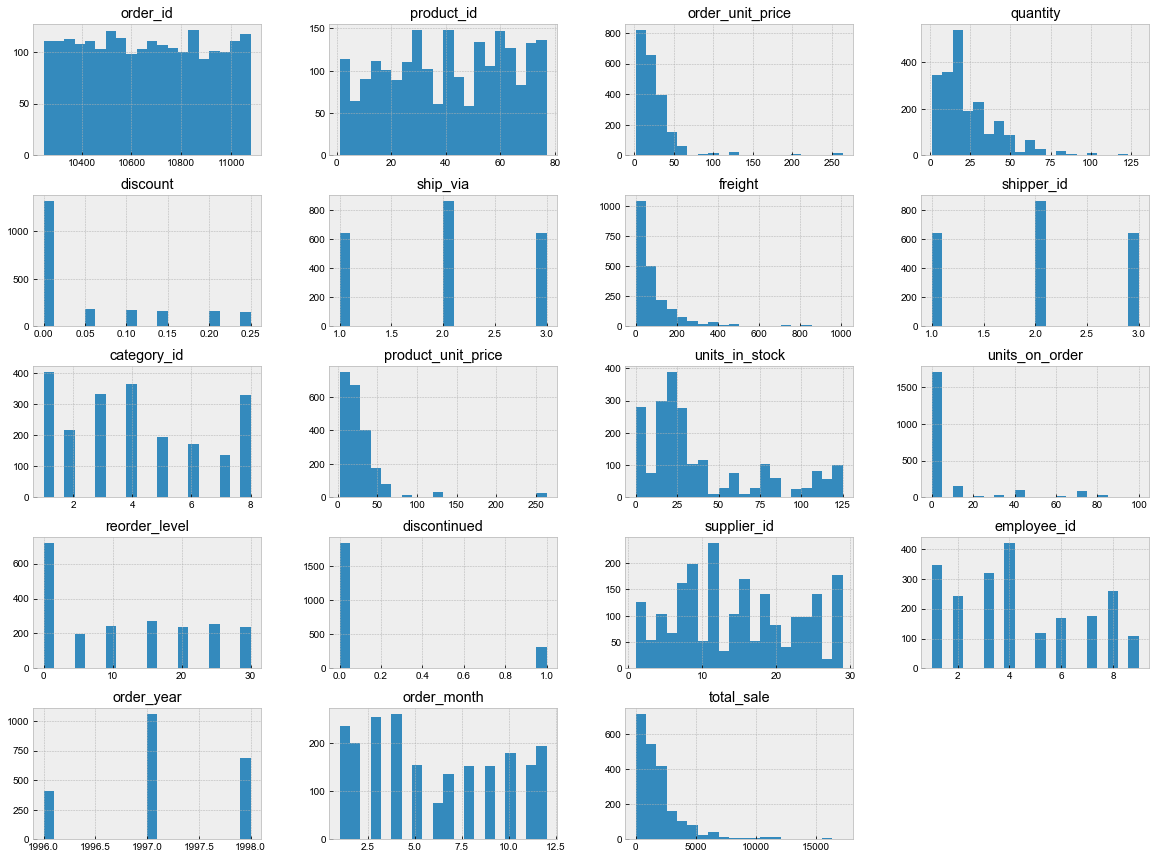

In [20]:
v_num.hist(bins=20);
sns.set_theme(style ='darkgrid')

## Variáveis Categóricas

In [21]:
print(v_cat.dtypes)
v_cat.head()

product_name         object
ship_name            object
ship_city            object
ship_country         object
shipper_name         object
category_name        object
quantity_per_unit    object
supplier_name        object
supplier_city        object
supplier_country     object
customer_id          object
customer_name        object
customer_city        object
customer_country     object
lat                  object
long                 object
employee_name        object
employee_title       object
employee_city        object
employee_country     object
dtype: object


product_name                  ship_name     ship_city  \
0                 Queso Cabrales  Vins et alcools Chevalier         Reims   
1                 Queso Cabrales         Seven Seas Imports        London   
2                 Queso Cabrales          LILA-Supermercado  Barquisimeto   
3                 Queso Cabrales       Spécialités du monde         Paris   
4  Singaporean Hokkien Fried Mee  Vins et alcools Chevalier         Reims   

  ship_country      shipper_name   category_name quantity_per_unit  \
0       France  Federal Shipping  Dairy Products         1 kg pkg.   
1           UK    Speedy Express  Dairy Products         1 kg pkg.   
2    Venezuela    United Package  Dairy Products         1 kg pkg.   
3       France    United Package  Dairy Products         1 kg pkg.   
4       France  Federal Shipping  Grains/Cereals   32 - 1 kg pkgs.   

                        supplier_name supplier_city supplier_country  \
0  Cooperativa de Quesos 'Las Cabras'        Oviedo            Spain   
1  Cooperativa de Quesos 'Las Cabras'        Oviedo            Spain   
2  Cooperativa de Quesos 'Las Cabras'        Oviedo            Spain   
3  Cooperativa de Quesos 'Las Cabras'        Oviedo            Spain   
4                        Leka Trading     Singapore        Singapore   

  customer_id              customer_name customer_city customer_country  \
0       VINET  Vins et alcools Chevalier         Reims           France   
1       SEVES         Seven Seas Imports        London               UK   
2       LILAS          LILA-Supermercado  Barquisimeto        Venezuela   
3       SPECD       Spécialités du monde         Paris           France   
4       VINET  Vins et alcools Chevalier         Reims           France   

          lat        long    employee_name employee_title employee_city  \
0  46.227.638   2.213.749  Buchanan Steven  Sales Manager        London   
1  55.378.051  -3.435.973  Buchanan Steven  Sales Manager        London   
2     642.375  -6.658.973  Buchanan Steven  Sales Manager        London   
3  46.227.638   2.213.749  Buchanan Steven  Sales Manager        London   
4  46.227.638   2.213.749  Buchanan Steven  Sales Manager        London   

  employee_country  
0               UK  
1               UK  
2               UK  
3               UK  
4               UK

In [22]:
data.head().T

0  \
order_id                                         10248   
order_date                         1996-07-04 00:00:00   
required_date                      1996-08-01 00:00:00   
shipped_date                       1996-07-16 00:00:00   
product_id                                          11   
product_name                            Queso Cabrales   
order_unit_price                                 14.00   
quantity                                            12   
discount                                          0.00   
ship_via                                             3   
freight                                          32.38   
ship_name                    Vins et alcools Chevalier   
ship_city                                        Reims   
ship_country                                    France   
shipper_id                                           3   
shipper_name                          Federal Shipping   
category_id                                          4   
category_name                           Dairy Products   
quantity_per_unit                            1 kg pkg.   
product_unit_price                               21.00   
units_in_stock                                      22   
units_on_order                                      30   
reorder_level                                       30   
discontinued                                         0   
supplier_id                                          5   
supplier_name       Cooperativa de Quesos 'Las Cabras'   
supplier_city                                   Oviedo   
supplier_country                                 Spain   
customer_id                                      VINET   
customer_name                Vins et alcools Chevalier   
customer_city                                    Reims   
customer_country                                France   
lat                                         46.227.638   
long                                         2.213.749   
employee_id                                          5   
employee_name                          Buchanan Steven   
employee_title                           Sales Manager   
employee_hire_date                 1993-10-17 00:00:00   
employee_city                                   London   
employee_country                                    UK   
order_year                                        1996   
order_month                                          7   
total_sale                                      440.00   

                                                     1  \
order_id                                         10869   
order_date                         1998-02-04 00:00:00   
required_date                      1998-03-04 00:00:00   
shipped_date                       1998-02-09 00:00:00   
product_id                                          11   
product_name                            Queso Cabrales   
order_unit_price                                 21.00   
quantity                                            10   
discount                                          0.00   
ship_via                                             1   
freight                                         143.28   
ship_name                           Seven Seas Imports   
ship_city                                       London   
ship_country                                        UK   
shipper_id                                           1   
shipper_name                            Speedy Express   
category_id                                          4   
category_name                           Dairy Products   
quantity_per_unit                            1 kg pkg.   
product_unit_price                               21.00   
units_in_stock                                      22   
units_on_order                                      30   
reorder_level                                       30   
discontinued                                         0   
supplier_id                                       

# 5.0 Hypothesis creation

### 1 - Descontos têm um efeito significativo no volume de itens do pedido? Caso afirmativo, em que nível (s) de desconto?
**Falso:** Apesar da maioria das compras serem enviadas abaixo do tempo médio de envio, o tempo de envio parece não afetar o ticket médio de compra.

In [23]:
x1 = data[['order_id', 'product_id', 'quantity', 'total_sale', 'discount']].copy()
#x1 = x1.groupby(['order_id', 'total_sale']).agg({'quantity': 'sum', 'discount': 'sum'}).reset_index()

In [24]:
x1.head()
#x1.describe()

order_id  product_id  quantity  total_sale  discount
0     10248          11        12      440.00      0.00
1     10869          11        10     1630.00      0.00
2     10823          11        20     3107.50      0.10
3     11043          11        10      210.00      0.00
4     10248          42        10      440.00      0.00

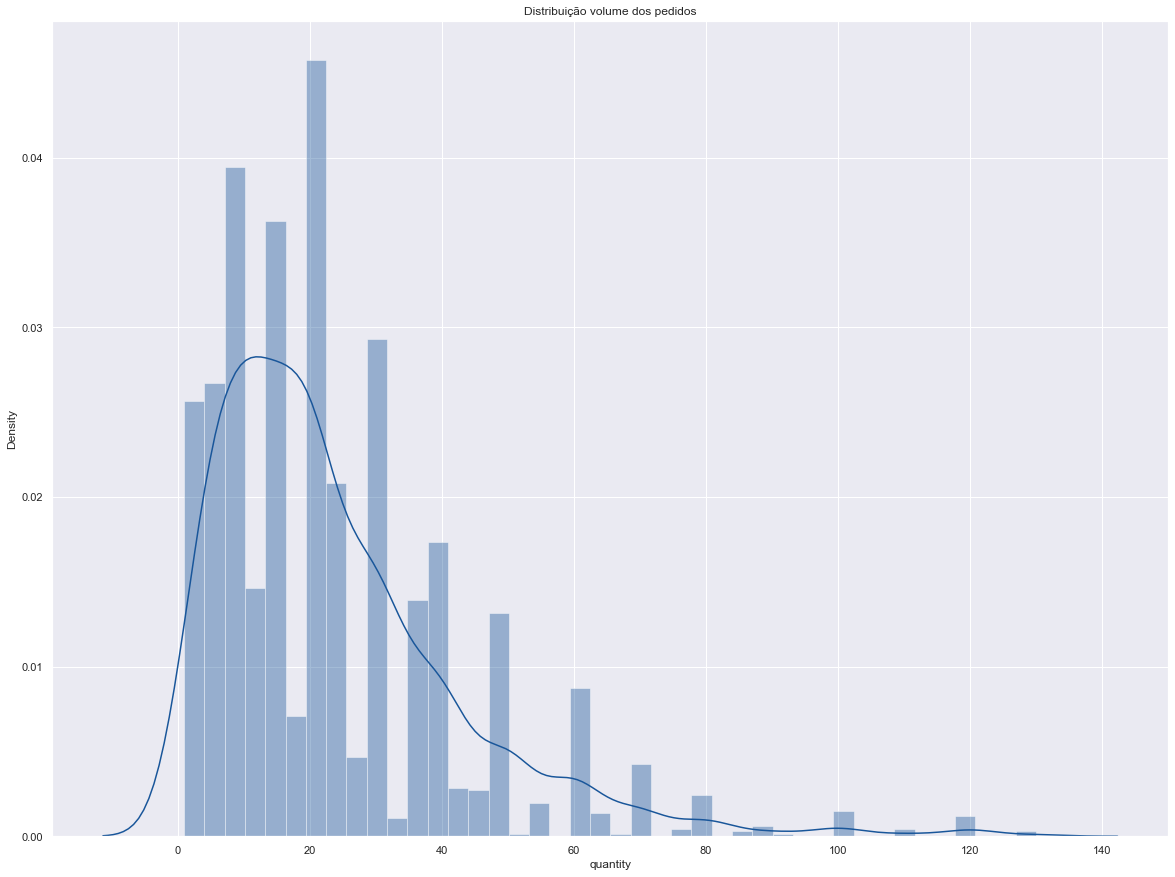

In [25]:
# Visualize data for normality
#plt.figure(figsize=(8,5))
sns.distplot(x1['quantity'], color='#19569A')
plt.title('Distribuição volume dos pedidos')
plt.savefig('img1.1_distribuição_volume_pedidos.png')
plt.show()

### Criar grupo com e sem desconto

In [26]:
n_discount = x1[x1['discount'] == 0.0]['quantity']
discount = x1[x1['discount'] != 0.0]['quantity']

print(len(n_discount), len(discount))

1317 838


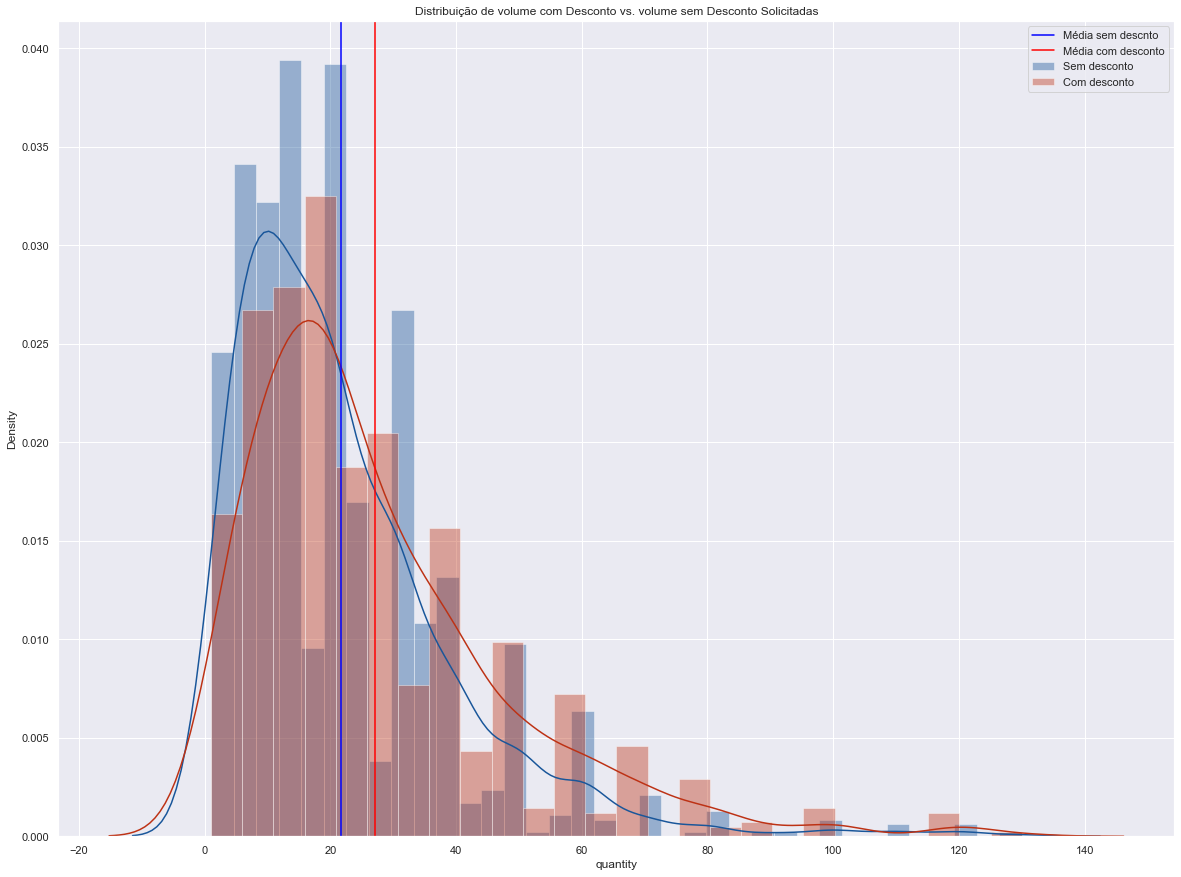

In [27]:
#plt.figure(figsize=(8,5))
sns.distplot(n_discount, color='#19569A', label='Sem desconto')
sns.distplot(discount, color = '#BD3215', label='Com desconto')
plt.axvline(np.mean(n_discount), color='blue', label='Média sem descnto')
plt.axvline(np.mean(discount), color='red', label='Média com desconto')
plt.title('Distribuição de volume com Desconto vs. volume sem Desconto Solicitadas')
plt.legend()
plt.savefig('img1.2_distribuição_volume_pedidos_comesemdesconto.png')
plt.show()

In [28]:
print('Média sem desconto:', np.mean(n_discount))
print('Média com desconto:', np.mean(discount))
print('Diferença:', np.mean(discount) - np.mean(n_discount))

Média sem desconto: 21.715261958997722
Média com desconto: 27.10978520286396
Diferença: 5.394523243866239


## Tukey Test
Entender quais os niveis de desconto são siginificativos

In [29]:
x1['discount'].unique()

array([0.  , 0.1 , 0.05, 0.25, 0.15, 0.2 , 0.06, 0.03, 0.01, 0.02, 0.04])

In [30]:
# Agrupe nossos pedidos por desconto
# Observe que descontos abaixo de 5% e em 6% raramente acontecem
x1['quantity'].groupby(x1['discount']).describe()

count  mean   std  min   25%   50%   75%    max
discount                                                  
0.00     1317.00 21.72 17.51 1.00 10.00 18.00 30.00 130.00
0.01        1.00  2.00   NaN 2.00  2.00  2.00  2.00   2.00
0.02        2.00  2.00  1.41 1.00  1.50  2.00  2.50   3.00
0.03        3.00  1.67  0.58 1.00  1.50  2.00  2.00   2.00
0.04        1.00  1.00   NaN 1.00  1.00  1.00  1.00   1.00
0.05      185.00 28.01 22.19 1.00 14.00 20.00 40.00 120.00
0.06        1.00  2.00   NaN 2.00  2.00  2.00  2.00   2.00
0.10      173.00 25.24 21.19 2.00 10.00 20.00 30.00 130.00
0.15      157.00 28.38 20.92 2.00 15.00 21.00 40.00 100.00
0.20      161.00 27.02 18.83 2.00 12.00 21.00 40.00 100.00
0.25      154.00 28.24 20.12 2.00 15.00 25.00 36.00 120.00

In [31]:
mc = MultiComparison(x1['quantity'], x1['discount'])
result = mc.tukeyhsd()
print(result)
print(mc.groupsunique)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
   0.0   0.01 -19.7153    0.9 -80.3306 40.9001  False
   0.0   0.02 -19.7153    0.9  -62.593 23.1625  False
   0.0   0.03 -20.0486  0.725 -55.0714 14.9742  False
   0.0   0.04 -20.7153    0.9 -81.3306 39.9001  False
   0.0   0.05   6.2955 0.0011   1.5381  11.053   True
   0.0   0.06 -19.7153    0.9 -80.3306 40.9001  False
   0.0    0.1   3.5217 0.4269  -1.3783  8.4217  False
   0.0   0.15   6.6669 0.0014    1.551 11.7828   True
   0.0    0.2   5.3096 0.0303   0.2508 10.3684   True
   0.0   0.25    6.525 0.0023   1.3647 11.6852   True
  0.01   0.02      0.0    0.9 -74.2101 74.2101  False
  0.01   0.03  -0.3333    0.9 -70.2993 69.6326  False
  0.01   0.04     -1.0    0.9 -86.6905 84.6905  False
  0.01   0.05  26.0108    0.9  -34.745 86.7667  False
  0.01   0.06      0.0    0.9 -85.6905 85.6905  False
  0.01    0.1   23.237    0.

In [32]:
d = x1[x1['discount'] != 0][['quantity', 'discount']]
d = d.groupby(['discount']).agg({'quantity' : 'sum'})

#x2.groupby(['employee_country']).agg({ 'customer_id': 'nunique' }).reset_index()

### 2 - Existe uma diferença de valor de receita gerada pelos funcionários dos estados unidos e no reino unido? E entre os funcionários?
**Falso:** Apesar da maioria das compras serem enviadas abaixo do tempo médio de envio, o tempo de envio parece não afetar o ticket médio de compra.

In [33]:
x2 = data[['order_id', 'employee_id', 'employee_name', 'employee_country', 'employee_hire_date', 'total_sale', 'customer_id', 'customer_name']].copy()
x2 = x2.drop_duplicates(subset='order_id', keep='last')

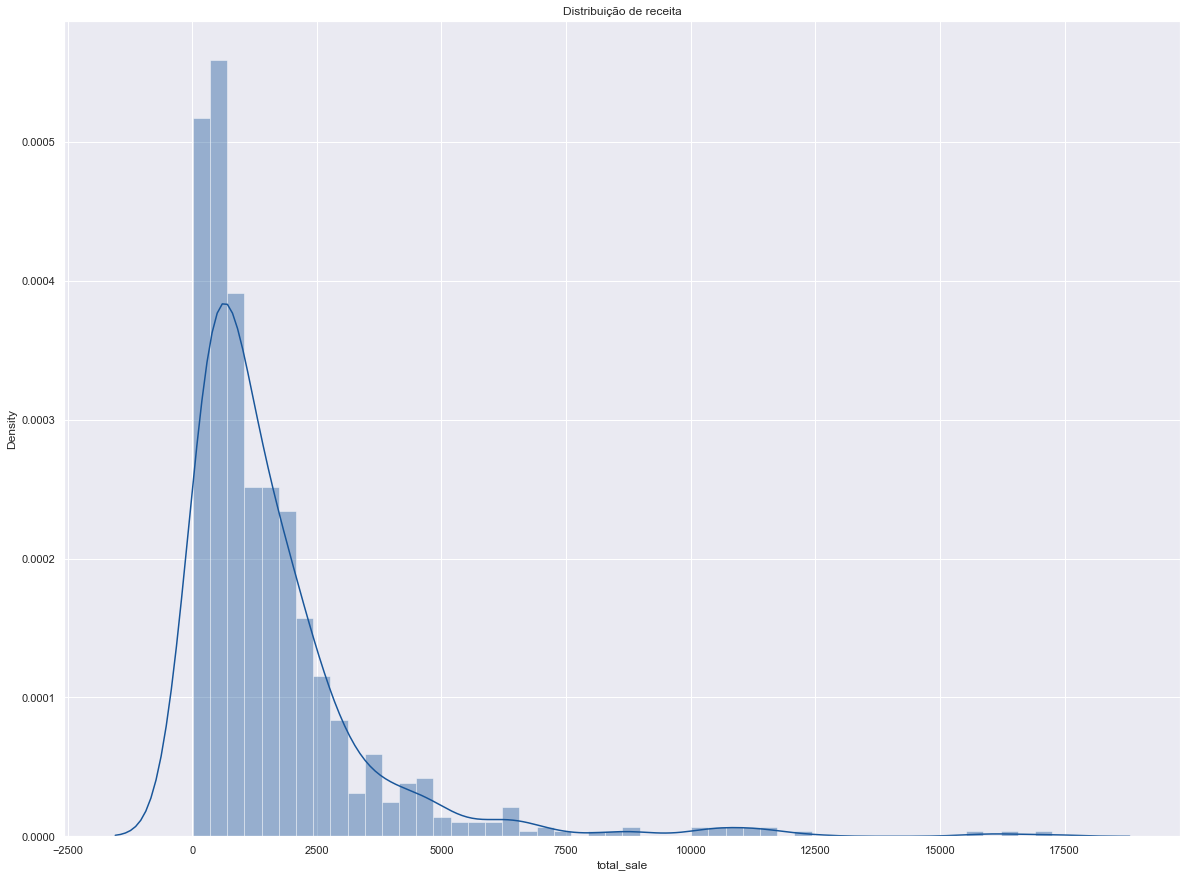

In [34]:
#plt.figure(figsize=(8,5))
sns.distplot(x2['total_sale'], color='#19569A')
plt.title('Distribuição de receita')
plt.savefig('img2.1_distribuição_de_receita.png')
plt.show()

### Divisão de funcionários

In [35]:
usa = x2[x2['employee_country'] == 'USA']['total_sale']
uk = x2[x2['employee_country'] == 'UK']['total_sale']

In [36]:
#usa.shape, uk.shape

In [37]:
x2['total_sale'].groupby(x2['employee_country']).describe()

count    mean     std   min    25%     50%     75%      max
employee_country                                                             
UK               224.00 1687.62 2203.22 12.50 480.00  930.12 2023.65 16321.90
USA              606.00 1611.28 1907.58 18.40 481.10 1070.50 2028.65 17250.00

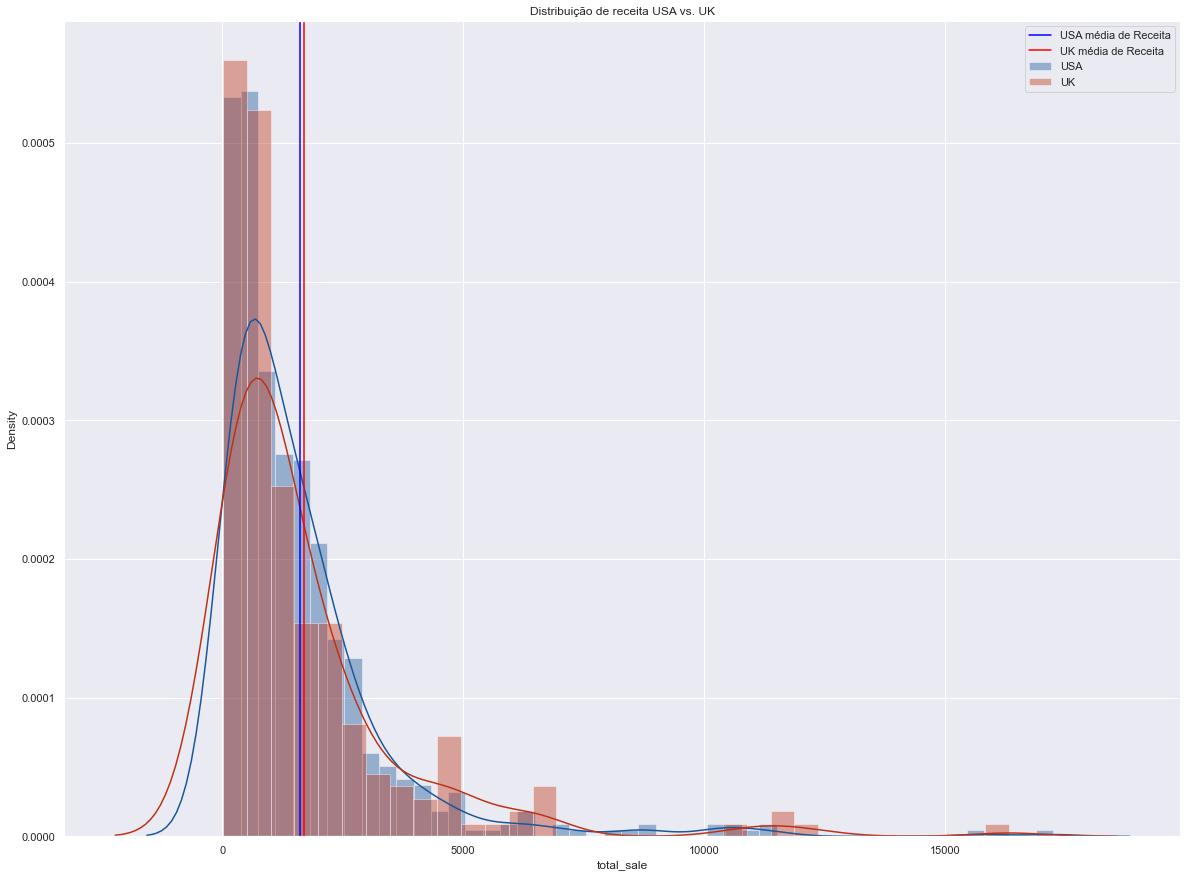

In [38]:
# Visualize Groups
#plt.figure(figsize=(8,5))
sns.distplot(usa, color='#19569A', label='USA')
sns.distplot(uk, color ='#BD3215', label='UK')
plt.axvline(np.mean(usa), color='blue', label='USA média de Receita')
plt.axvline(np.mean(uk), color='red', label='UK média de Receita')
plt.title('Distribuição de receita USA vs. UK')
plt.legend()
plt.savefig('img2.2_distribuição_de_receita_USA_UK.png')
plt.show()

In [39]:
print('Média de receita USA:', np.mean(usa))
print('Média de receita UK:', np.mean(uk))
print('Diferença entre as médias:', np.mean(uk) - np.mean(usa))

Média de receita USA: 1611.2751650165014
Média de receita UK: 1687.615357142857
Diferença entre as médias: 76.34019212635553


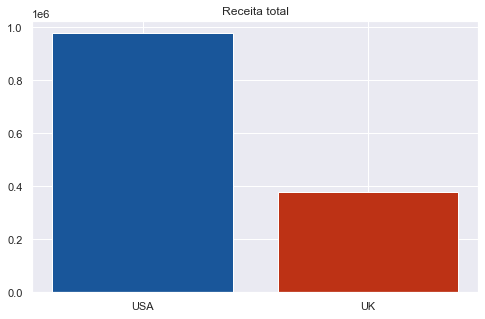

In [40]:
plt.figure(figsize=(8,5))
plt.bar('USA', usa.sum(), color='#19569A')
plt.bar('UK', uk.sum(), color = '#BD3215')
plt.title('Receita total')
plt.savefig('img2.3_receita_total.png')
plt.show()

In [41]:
#employee = x2[['customer_id', 'customer_name', 'employee_id','employee_name','employee_country', 'total_sale']]

In [42]:
# média de receita gerada por funcionário
x2.groupby(['employee_country', 'employee_id']).agg({'total_sale': 'describe'}).reset_index()

employee_country employee_id total_sale                                \
                                    count    mean     std    min    25%   
0               UK           5      42.00 1799.23 2182.29 103.20 626.28   
1               UK           6      67.00 1167.14 1010.63  48.00 486.50   
2               UK           7      72.00 1962.44 2808.81  45.00 423.00   
3               UK           9      43.00 1929.40 2355.55  12.50 420.00   
4              USA           1     123.00 1643.44 1853.36  45.00 574.00   
5              USA           2      96.00 1851.55 2570.53  40.00 538.34   
6              USA           3     127.00 1677.57 2127.09  45.00 386.85   
7              USA           4     156.00 1603.77 1695.11  18.40 500.95   
8              USA           8     104.00 1281.74 1087.09  36.00 467.00   

                            
      50%     75%      max  
0  975.00 2086.07 12281.20  
1  848.00 1659.70  4735.44  
2  875.62 2132.75 16321.90  
3 1152.50 2061.70 11380.00  
4 1150.00 2197.72 15810.00  
5 1093.50 2064.00 17250.00  
6 1140.00 2041.25 11490.70  
7 1065.55 1918.20 11283.20  
8  912.00 1860.75  4825.00

In [43]:
# carteira de clientes por funcionários
total = x2.groupby(['employee_id', 'employee_name','employee_country','employee_hire_date']).agg({'order_id': 'count', 'customer_id': 'nunique', 'total_sale': 'sum'}).reset_index()
total

employee_id     employee_name employee_country employee_hire_date  \
0            1     Davolio Nancy              USA         1992-05-01   
1            2     Fuller Andrew              USA         1992-08-14   
2            3   Leverling Janet              USA         1992-04-01   
3            4  Peacock Margaret              USA         1993-05-03   
4            5   Buchanan Steven               UK         1993-10-17   
5            6    Suyama Michael               UK         1993-10-17   
6            7       King Robert               UK         1994-01-02   
7            8    Callahan Laura              USA         1994-03-05   
8            9    Dodsworth Anne               UK         1994-11-15   

   order_id  customer_id  total_sale  
0       123           65   202143.71  
1        96           59   177749.26  
2       127           63   213051.30  
3       156           75   250187.45  
4        42           29    75567.75  
5        67           43    78198.10  
6        72           45   141295.99  
7       104           56   133301.03  
8        43           29    82964.00

In [44]:
# clientes escritório USA vs. UK
x2.groupby(['employee_country']).agg({ 'customer_id': 'nunique' }).reset_index()

employee_country  customer_id
0               UK           77
1              USA           89

In [45]:
# criar tabela em que pega a ultima compra e verifica quem foi o vendedor que vendeu a ultima compra, faz a contagem de carteira de clientes desta forma

In [46]:
usa_total = total[total['employee_country']=='USA']
uk_total = total[total['employee_country']=='UK']
print('Diferença entre o total vendido: ${}'.format(round(usa_total['total_sale'].sum() - uk_total['total_sale'].sum(),2)))

Diferença entre o total vendido: $598406.91


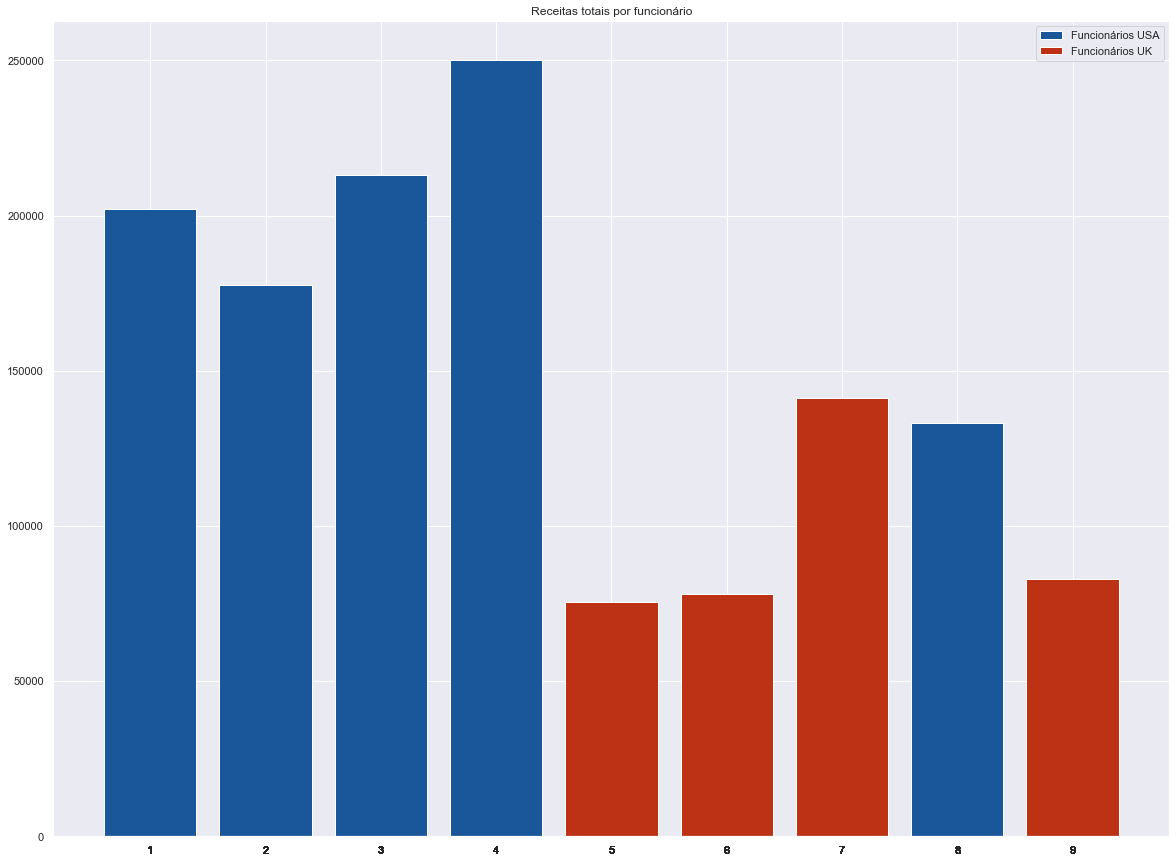

In [47]:
plt.bar(usa_total['employee_id'], usa_total['total_sale'], color='#19569A', label='Funcionários USA')
plt.bar(uk_total['employee_id'], uk_total['total_sale'], color = '#BD3215', label = 'Funcionários UK')
plt.xticks(x2['employee_id'])
plt.title('Receitas totais por funcionário')
plt.legend()
plt.savefig('img2.4_receitas_totais_por_funcionarios.png')
plt.show()

### 3 - Existe diferença entre empresas de envio com base no tempo de envio e no preço do frete?
**Falso:** Apesar da maioria das compras serem enviadas abaixo do tempo médio de envio, o tempo de envio parece não afetar o ticket médio de compra.

In [48]:
#data['shipped_time'] = data['required_date'] - data['order_date']

data['shipped_time'] = (data['required_date'] - data['order_date']).dt.days

In [68]:
x3 = data[['order_id','ship_via', 'shipper_name', 'order_date', 'required_date', 'shipped_time', 'freight']].copy()
x3 = x3.drop_duplicates(subset='order_id', keep='last')

x3.head()

order_id  ship_via      shipper_name order_date required_date  \
3      11043         2    United Package 1998-04-22    1998-05-20   
6      10248         3  Federal Shipping 1996-07-04    1996-08-01   
22     10922         3  Federal Shipping 1998-03-03    1998-03-31   
28     10874         2    United Package 1998-02-06    1998-03-06   
33     10649         3  Federal Shipping 1997-08-28    1997-09-25   

    shipped_time  freight  
3             28     8.80  
6             28    32.38  
22            28    62.74  
28            28    19.58  
33            28     6.20

In [51]:
# x3.isna().sum()
#x3.info()

No handles with labels found to put in legend.


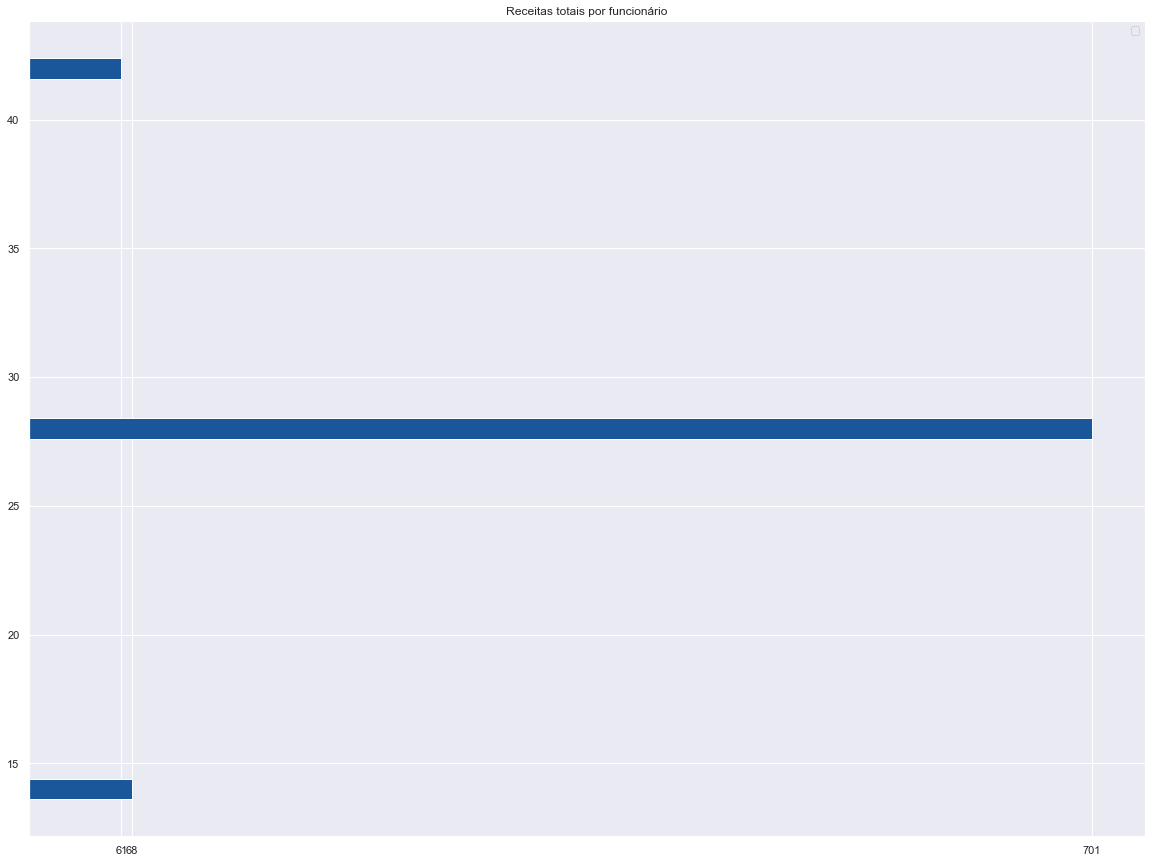

In [52]:
time = x3[['order_id','shipped_time']].groupby('shipped_time').count().reset_index()
plt.barh(time['shipped_time'], time['order_id'], color='#19569A')
plt.xticks(time['order_id'])
plt.title('Receitas totais por funcionário')
plt.legend()
#plt.savefig('img3.1_intervalo_de_envios.png')
plt.show()

In [53]:
# intervalo de envios
time = x3[['order_id','shipped_time']].groupby('shipped_time').count().reset_index()
fig = px.bar(time, x='shipped_time', y='order_id')
fig.write_image("img3.1_intervalo_de_envios.png")
fig.show()

In [57]:
# intervalo de envios
shippers = x3[['shipper_name','shipped_time']].groupby('shipper_name').mean().reset_index()

fig = px.bar(shippers, x='shipper_name', y='shipped_time')
fig.write_image("img3.2_tempo_medio_por_empresa.png")
fig.show()

In [65]:
# tempo
x3['shipped_time'].groupby(data['shipper_name']).describe().reset_index()

shipper_name  count  mean  std   min   25%   50%   75%   max
0  Federal Shipping 255.00 27.51 5.46 14.00 28.00 28.00 28.00 42.00
1    Speedy Express 249.00 28.06 5.69 14.00 28.00 28.00 28.00 42.00
2    United Package 326.00 28.04 5.44 14.00 28.00 28.00 28.00 42.00

In [66]:
# frete
x3['freight'].groupby(data['shipper_name']).describe().reset_index()

shipper_name  count  mean    std  min   25%   50%   75%     max
0  Federal Shipping 255.00 80.44 119.36 0.40 12.86 36.71 99.49 1007.64
1    Speedy Express 249.00 65.00  75.39 0.12 12.75 40.42 89.90  458.78
2    United Package 326.00 86.64 138.22 0.02 14.04 44.14 91.43  890.78

In [67]:
# quantidade de envios
frete = x3[['order_id','shipper_name']].groupby('shipper_name').count().reset_index()

fig = px.bar(frete, x='shipper_name', y='order_id')
fig.write_image("img3.3_quantidade_de_envios.png")
fig.show()

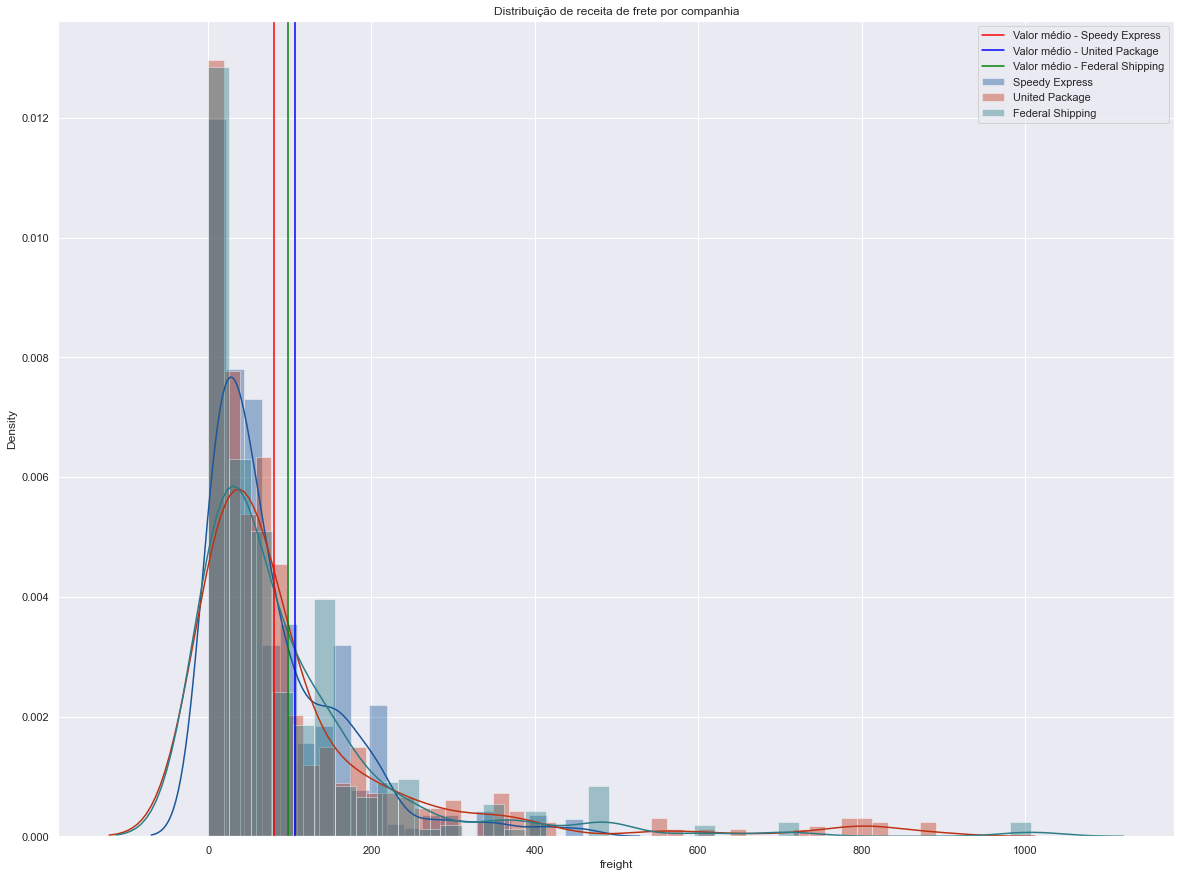

In [70]:
#plt.figure(figsize=(8,5))
sns.distplot(data[data['ship_via']== 1]['freight'], color='#19569A', label='Speedy Express')
sns.distplot(data[data['ship_via']== 2]['freight'], color = '#BD3215', label='United Package')
sns.distplot(data[data['ship_via']== 3]['freight'], color = '#2B7C85', label='Federal Shipping')
plt.axvline(np.mean(data[data['ship_via']== 1 ]['freight']), color='red', label='Valor médio - Speedy Express')
plt.axvline(np.mean(data[data['ship_via']== 2 ]['freight']), color='blue', label='Valor médio - United Package')
plt.axvline(np.mean(data[data['ship_via']== 3 ]['freight']), color='green', label='Valor médio - Federal Shipping')
plt.title('Distribuição de receita de frete por companhia')
plt.legend()
plt.savefig('img3.4_distribuicao_de_receita_de_frete_por_companhia.png')
plt.show()

### 4 - Há alguma diferença entre a receita média gerada nos estados unidos em comparação com os demais paises?
**Falso:** Apesar da maioria das compras serem enviadas abaixo do tempo médio de envio, o tempo de envio parece não afetar o ticket médio de compra.

In [71]:
data['total_order'] = data['quantity'] * data['order_unit_price']

In [72]:
x4 = data[['order_id', 'category_name', 'ship_country', 'quantity', 'order_unit_price', 'total_order', 'total_sale', 'customer_id', 'lat', 'long']].copy()
#x4 = x4.groupby(['order_id', 'category_name', 'ship_country', 'total_sale', 'customer_id']).agg({'quantity': 'sum'}).reset_index()
#x4 = x4.drop_duplicates(subset='order_id', keep='last')
x4.head()

order_id   category_name ship_country  quantity  order_unit_price  \
0     10248  Dairy Products       France        12             14.00   
1     10869  Dairy Products           UK        10             21.00   
2     10823  Dairy Products    Venezuela        20             21.00   
3     11043  Dairy Products       France        10             21.00   
4     10248  Grains/Cereals       France        10              9.80   

   total_order  total_sale customer_id         lat        long  
0       168.00      440.00       VINET  46.227.638   2.213.749  
1       210.00     1630.00       SEVES  55.378.051  -3.435.973  
2       420.00     3107.50       LILAS     642.375  -6.658.973  
3       210.00      210.00       SPECD  46.227.638   2.213.749  
4        98.00      440.00       VINET  46.227.638   2.213.749

In [74]:
# maiores paises compradores
orders = x4.drop_duplicates(subset='order_id', keep='last')
ranking = orders[['total_sale','ship_country']].groupby('ship_country').sum().sort_values(by='total_sale').reset_index()

fig = px.bar(ranking, x='total_sale', y='ship_country')
fig.write_image("img4.1_maiores_compradores.png")
fig.show()

In [75]:
orders['total_sale'].groupby(orders['ship_country']).describe().sort_values(by='count', ascending=False).reset_index()

ship_country  count    mean     std    min     25%     50%     75%      max
0           USA 122.00 2160.39 2514.27  36.00  557.17 1421.92 2814.68 16321.90
1       Germany 122.00 2005.25 2479.70  86.40  632.75 1333.38 2250.00 17250.00
2        Brazil  83.00 1385.16 2153.33  45.00  482.90  928.00 1503.23 15810.00
3        France  77.00 1110.37 1196.06  45.00  414.00  670.80 1688.00  7390.20
4            UK  56.00 1082.44 1026.79  45.00  354.62  734.75 1532.50  4675.00
5     Venezuela  46.00 1322.06  897.82 112.00  512.25 1121.35 1930.53  3163.20
6       Austria  40.00 3487.42 2457.52 344.00 1753.61 2626.75 5002.75 10741.60
7        Sweden  37.00 1608.75 1392.64  93.00  630.00 1459.00 2262.50  6527.25
8        Canada  30.00 1844.47 2172.30  57.50  712.62 1155.15 2450.65 11493.20
9        Mexico  28.00  859.77  821.63  88.80  396.28  614.40  961.42  4150.05
10        Italy  28.00  596.61  574.27  18.40  105.88  522.80  770.75  1852.00
11        Spain  23.00  844.86 1031.60  60.00  155.20  365.89  920.00  4035.80
12      Finland  22.00  899.02  702.49 120.00  397.84  620.40 1291.09  2684.00
13      Ireland  19.00 3016.70 2630.96 703.25 1576.75 2048.50 3118.00 10835.24
14      Belgium  19.00 1849.21 1291.58  28.00  848.50 1500.70 2581.90  4581.00
15  Switzerland  18.00 1828.86 1062.06 482.90 1194.40 1762.63 2285.77  4666.94
16      Denmark  18.00 1932.35 2566.91  65.00  817.92  955.00 1893.40 11283.20
17    Argentina  16.00  507.44  540.62  12.50  140.00  381.30  691.53  2220.00
18     Portugal  13.00  959.13  795.87  68.00  305.30  843.20 1515.75  2633.90
19       Poland   7.00  504.56  212.24 160.00  413.68  459.00  638.80   808.00
20       Norway   6.00  955.86  891.12 200.00  530.59  646.17  961.30  2684.40

In [76]:
##customers = data[data['decision']!=0][['id','lat','long','price','expected_profit']].copy()
#customers = x4.groupby(['ship_country', 'lat', 'long']).agg({'total_sale': 'sum'}).copy()

#fig = px.scatter_mapbox(customers,
#                  lat='lat',
#                  lon='long',
#                  size='total_sale',
#                  color_continuous_scale=px.colors.cyclical.IceFire,
#                  size_max=15,
#                  zoom=10)

##dizer pra função o tipo de mapa que eu quero
#fig.update_layout(mapbox_style='open-street-map')
#fig.update_layout(height=600, margin={'r':0, 'l':0, 'b':0, 't':0})
#fig.show()

In [77]:
usa = orders[orders['ship_country']=='USA']

print('Média outros paises:', np.mean(x4['total_sale']))
print('Média USA:', np.mean(usa['total_sale']))
print('Diferença entre as médias:', np.mean(usa['total_sale']) - np.mean(x4['total_sale']))

Média outros paises: 1986.0359396751771
Média USA: 2160.385081967213
Diferença entre as médias: 174.34914229203582


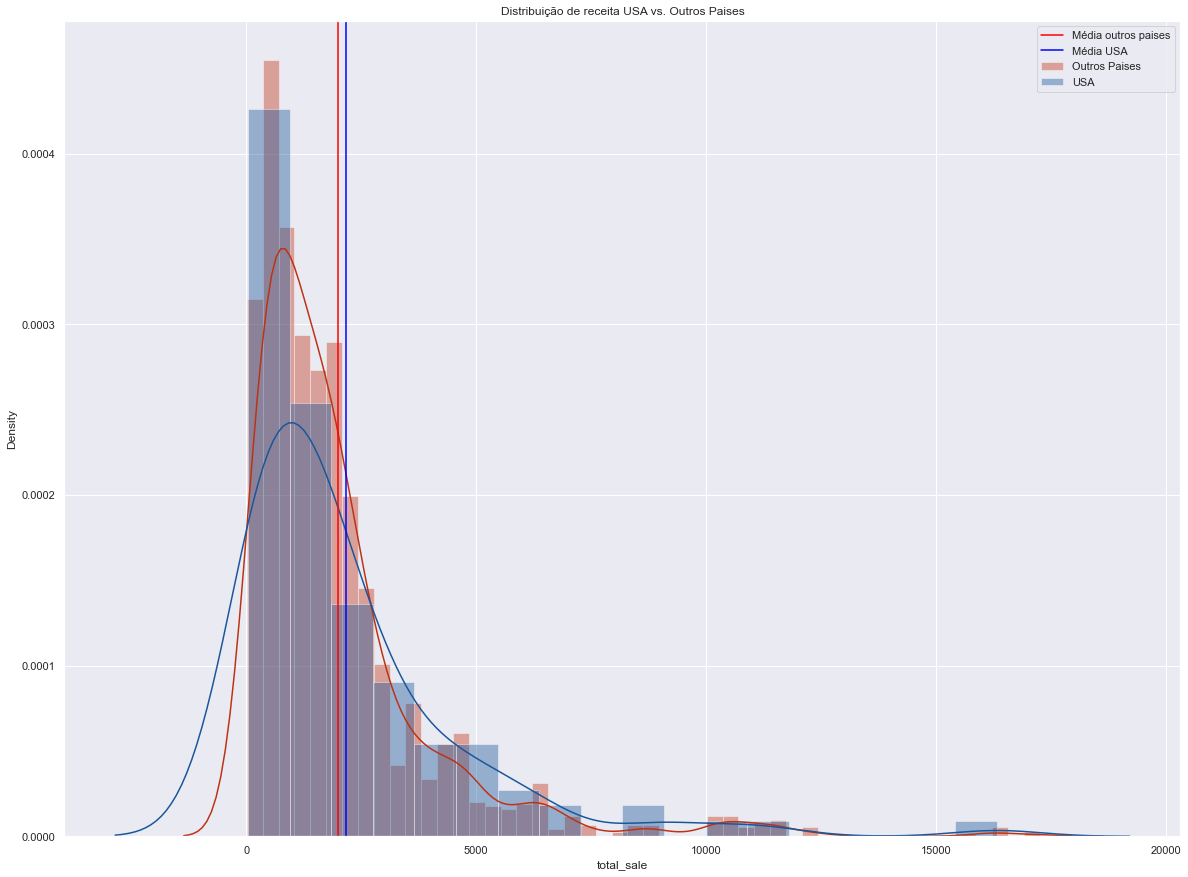

In [80]:
# plt.figure(figsize=(8,5))
sns.distplot(x4['total_sale'], color = '#BD3215', label='Outros Paises')
sns.distplot(usa['total_sale'], color='#19569A', label='USA')
plt.axvline(np.mean(x4['total_sale']), color='red', label='Média outros paises')
plt.axvline(np.mean(usa['total_sale']), color='blue', label='Média USA')
plt.title('Distribuição de receita USA vs. Outros Paises')
plt.legend()
plt.savefig('img4.2_distribuicao_de_receita_USA_Outros_Paises.png')
plt.show()

In [81]:
usa

order_id   category_name ship_country  quantity  order_unit_price  \
73       10711    Meat/Poultry          USA       120             32.80   
100      10714     Confections          USA        50              9.50   
106      10269  Dairy Products          USA        60              2.00   
108      10607         Seafood          USA        42             18.40   
110      10569       Beverages          USA        30             18.00   
...        ...             ...          ...       ...               ...   
2106     10805       Beverages          USA        10            263.50   
2123     10983  Grains/Cereals          USA        15             19.50   
2127     10815  Dairy Products          USA        16              2.50   
2133     10808       Beverages          USA        50             18.00   
2147     10657      Condiments          USA        50             15.50   

      total_order  total_sale customer_id        lat         long  
73        3936.00     4451.70       SAVEA  3.709.024  -95.712.891  
100        475.00     2941.00       SAVEA  3.709.024  -95.712.891  
106        120.00      676.00       WHITC  3.709.024  -95.712.891  
108        772.80     6475.40       SAVEA  3.709.024  -95.712.891  
110        540.00      977.50       RATTC  3.709.024  -95.712.891  
...           ...         ...         ...        ...          ...  
2106      2635.00     2775.00       THEBI  3.709.024  -95.712.891  
2123       292.50      796.50       SAVEA  3.709.024  -95.712.891  
2127        40.00       40.00       SAVEA  3.709.024  -95.712.891  
2133       900.00     1660.00       OLDWO  3.709.024  -95.712.891  
2147       775.00     4371.60       SAVEA  3.709.024  -95.712.891  

[122 rows x 10 columns]

In [82]:
category = x4.groupby(['order_id', 'category_name', 'ship_country', 'customer_id']).agg({'quantity': 'sum','total_order': 'sum'}).reset_index()
usa = category[category['ship_country'] == 'USA']

In [83]:
# média de receita por categoria
category['total_order'].groupby(category['category_name']).describe().sort_values(by='mean', ascending=False).reset_index()

category_name  count    mean     std   min    25%    50%     75%      max
0    Meat/Poultry 161.00 1106.76 1531.40 22.35 234.00 524.00 1386.00  9903.20
1  Dairy Products 303.00  829.47  869.58 10.00 230.40 544.00 1124.25  6050.00
2         Produce 129.00  816.04  837.92 50.00 240.00 530.00 1092.00  6360.00
3       Beverages 354.00  809.40 1945.85 15.50 144.00 310.00  600.00 17250.00
4     Confections 295.00  600.34  746.23  7.30 154.72 388.80  676.55  6140.50
5      Condiments 193.00  589.09  543.16 26.00 240.00 408.45  780.00  3420.00
6  Grains/Cereals 182.00  553.44  609.61 14.00 141.50 390.00  760.00  4322.50
7         Seafood 291.00  486.68  545.73  4.80 137.45 336.00  583.80  3490.00

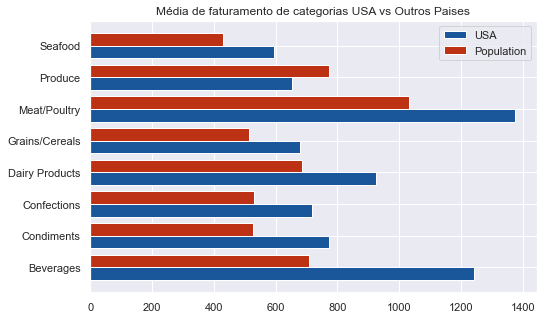

In [87]:
mund_avg = pd.DataFrame(x4['total_order'].groupby(x4['category_name']).mean()).reset_index()
usa_avg = pd.DataFrame(usa['total_order'].groupby(usa['category_name']).mean()).reset_index()

plt.figure(figsize=(8,5))
plt.barh(usa_avg['category_name'], usa_avg['total_order'], color='#19569A', label='USA', height=-0.4, align='edge')
plt.barh(mund_avg['category_name'], mund_avg['total_order'], color = '#BD3215', label='Population', height=0.4, align='edge')
plt.title('Média de faturamento de categorias USA vs Outros Paises')
plt.legend()
plt.savefig('img4.3_Media_de_faturamento_de_categorias_USA_vs_Outros_Paises.png')
plt.show()

In [88]:
usa_avg

category_name  total_order
0       Beverages      1242.38
1      Condiments       773.16
2     Confections       718.59
3  Dairy Products       923.32
4  Grains/Cereals       680.38
5    Meat/Poultry      1375.58
6         Produce       654.12
7         Seafood       595.84

In [89]:
mund_avg

category_name  total_order
0       Beverages       709.23
1      Condiments       526.36
2     Confections       530.24
3  Dairy Products       686.70
4  Grains/Cereals       513.91
5    Meat/Poultry      1029.99
6         Produce       774.03
7         Seafood       429.16

In [91]:
# paises com maior número de clientes
ranking = x4[['customer_id','ship_country']].groupby('ship_country').nunique().sort_values(by='customer_id').reset_index()

fig = px.bar(ranking, x='customer_id', y='ship_country')
fig.write_image("img4.4_quantidade_de_clientes.png")
fig.show()

### 5 - Existe alguma diferença significativa entre a receita média obtida do primeiro trimestre de 2014 em relação ao primeiro trimestre de 2013?
**Falso:** Apesar da maioria das compras serem enviadas abaixo do tempo médio de envio, o tempo de envio parece não afetar o ticket médio de compra.

In [92]:
x5 = data[['order_id', 'order_date', 'total_sale', 'order_year', 'order_month']].copy()
x5 = x5.drop_duplicates(subset='order_id', keep='last')
x5.head()

order_id order_date  total_sale  order_year  order_month
3      11043 1998-04-22      210.00        1998            4
6      10248 1996-07-04      440.00        1996            7
22     10922 1998-03-03      742.50        1998            3
28     10874 1998-02-06      310.00        1998            2
33     10649 1997-08-28     1434.00        1997            8

In [94]:
month_fat = x5[['total_sale','order_month']].groupby('order_month').sum().reset_index()
#mean_fat = x5['total_sale'].sum() / x5['order_id'].count()

fig = px.bar(month_fat, x='order_month', y='total_sale')
fig.write_image("img5.1_faturamento_por_mes.png")
#fig.add_hline( y= mean_fat )
fig.show()

In [95]:
x5.shape

(830, 5)

In [96]:
x5['order_year'].value_counts()

1997    408
1998    270
1996    152
Name: order_year, dtype: int64

In [97]:
# criar 2 grupos
t1_1997 = x5[(x5['order_year']==1997) & (x5['order_month'] >= 3)]
t1_1998 = x5[(x5['order_year']==1998) & (x5['order_month'] >= 3)]

print('Faturamento médio 1º trimestre 1997:', np.mean(t1_1997['total_sale']))
print('Faturamento médio 2º trimestre 1998:', np.mean(t1_1998['total_sale']))
print('Diferença entre faturamento médio:', np.mean(t1_1998['total_sale']) - np.mean(t1_1997['total_sale']))

Faturamento médio 1º trimestre 1997: 1591.0079479768783
Faturamento médio 2º trimestre 1998: 1641.9544720496892
Diferença entre faturamento médio: 50.94652407281092


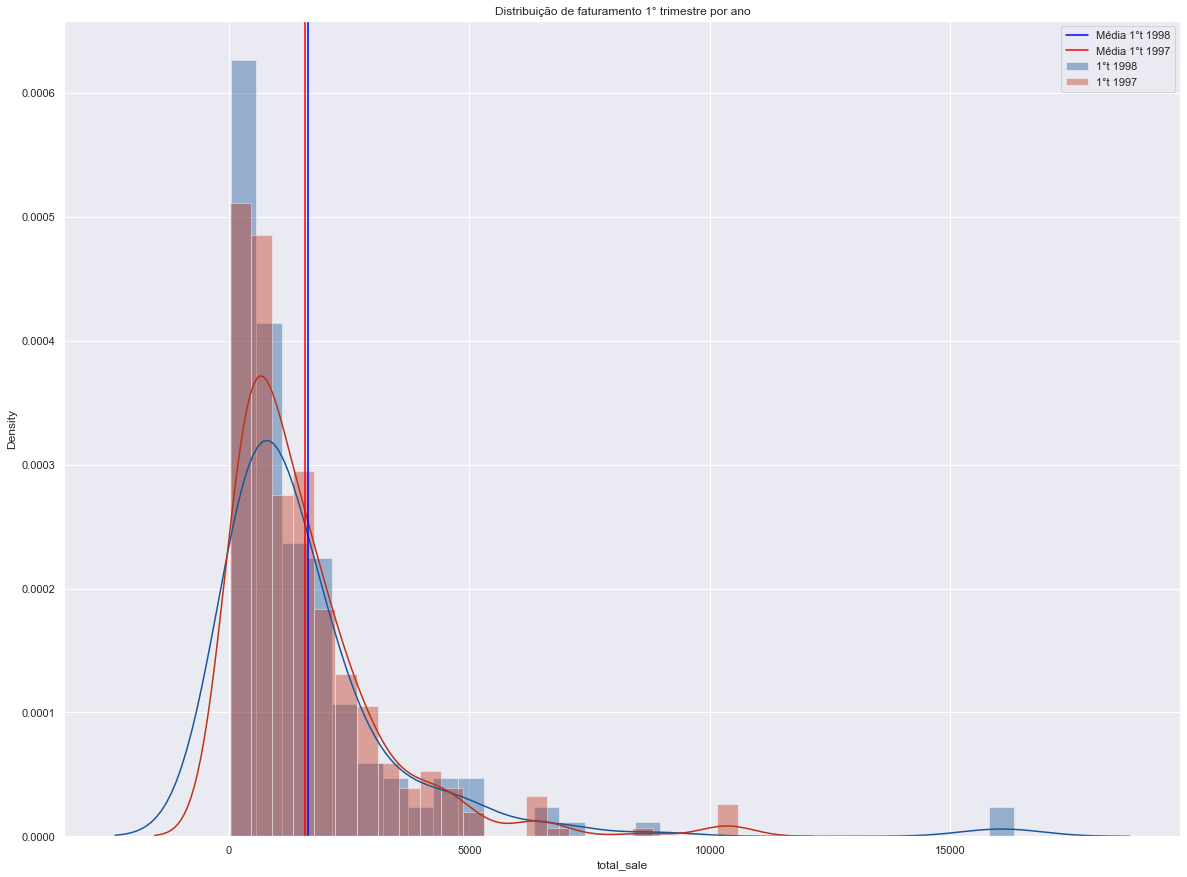

In [100]:
#plt.figure(figsize=(8,5))
sns.distplot(t1_1998['total_sale'], color='#19569A', label='1°t 1998')
sns.distplot(t1_1997['total_sale'], color = '#BD3215', label='1°t 1997')
plt.axvline(np.mean(t1_1998['total_sale']), color='blue', label='Média 1°t 1998')
plt.axvline(np.mean(t1_1997['total_sale']), color='red', label='Média 1°t 1997')
plt.title('Distribuição de faturamento 1° trimestre por ano')
plt.legend()
plt.savefig('img5.distribuicao_faturamento_1t.png')
plt.show()

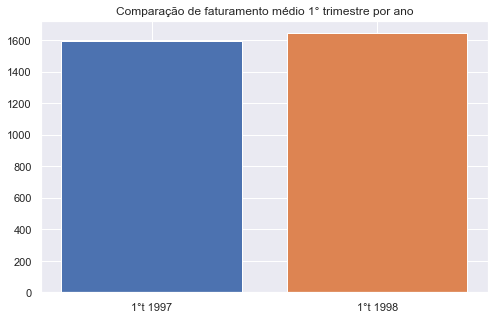

In [101]:
plt.figure(figsize=(8,5))
plt.bar(x='1°t 1997', height = np.mean(t1_1997['total_sale']))
plt.bar(x='1°t 1998', height = np.mean(t1_1998['total_sale']))
plt.title('Comparação de faturamento médio 1° trimestre por ano')
plt.show()

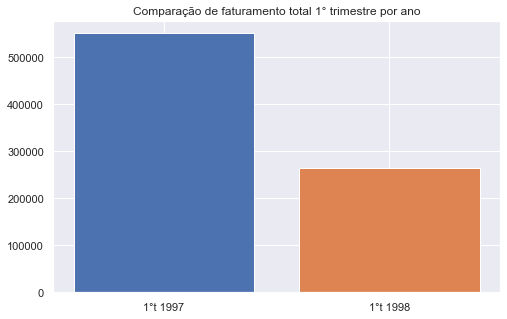

In [102]:
plt.figure(figsize=(8,5))
plt.bar(x='1°t 1997', height = np.sum(t1_1997['total_sale']))
plt.bar(x='1°t 1998', height = np.sum(t1_1998['total_sale']))
plt.title('Comparação de faturamento total 1° trimestre por ano')
plt.show()